# Assignment 1


Final belief distribution: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.96046448e-08 1.43051147e-06 1.64508820e-05 1.20639801e-04
 6.33358955e-04 2.53343582e-03 8.02254677e-03 2.06294060e-02
 4.38374877e-02 8.42968225e-02 1.52472854e-01 2.26688504e-01
 2.36840129e-01 1.56468272e-01 5.81771135e-02 9.26148891e-03]
Most likely position: 16


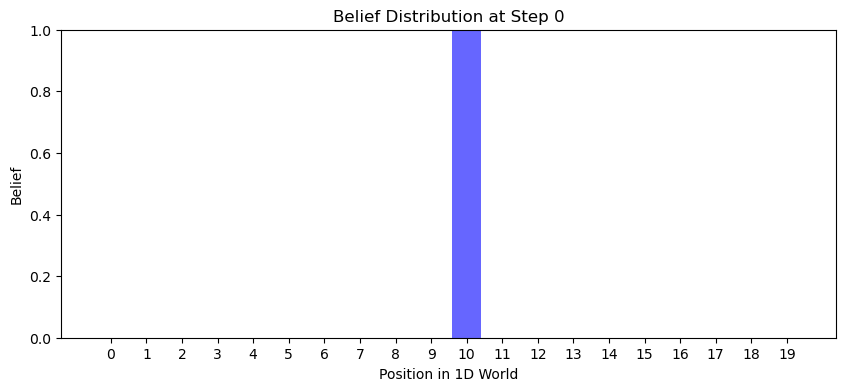

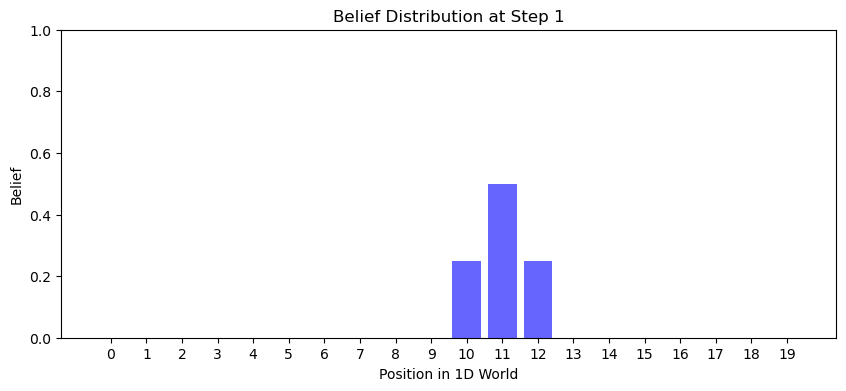

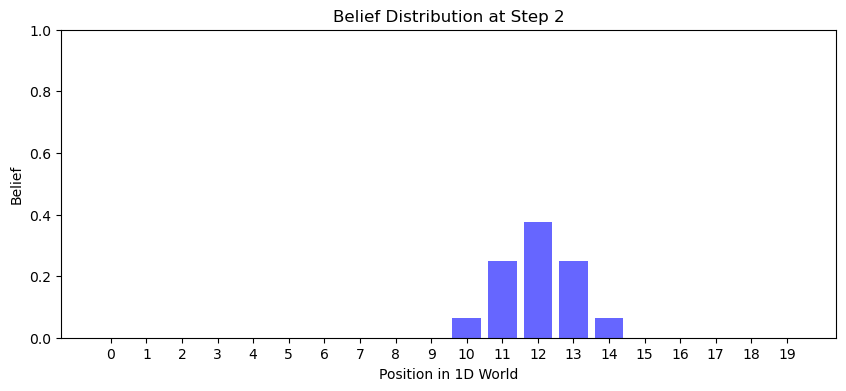

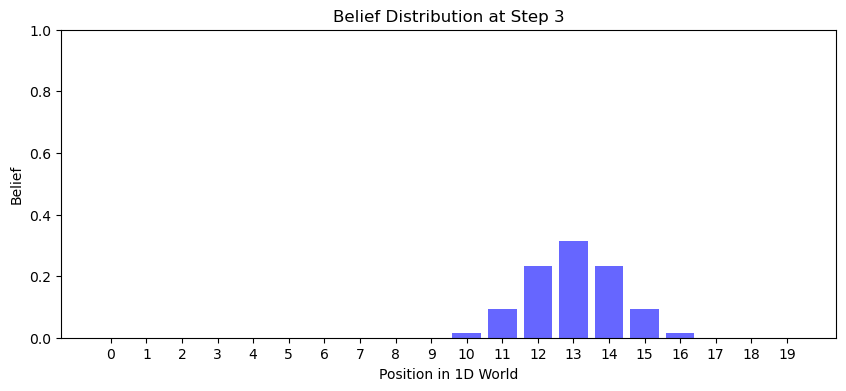

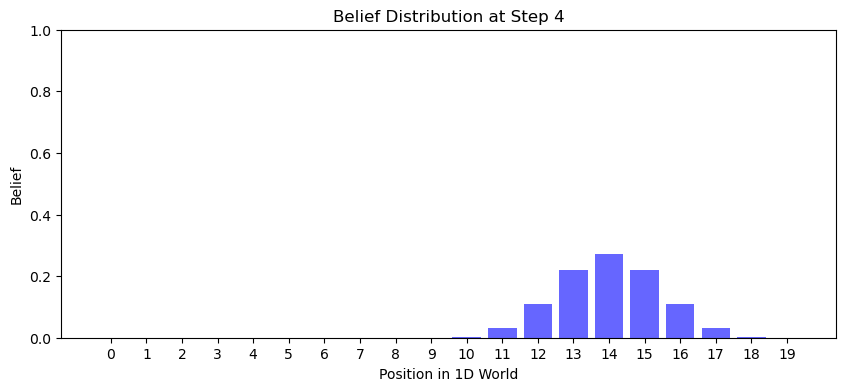

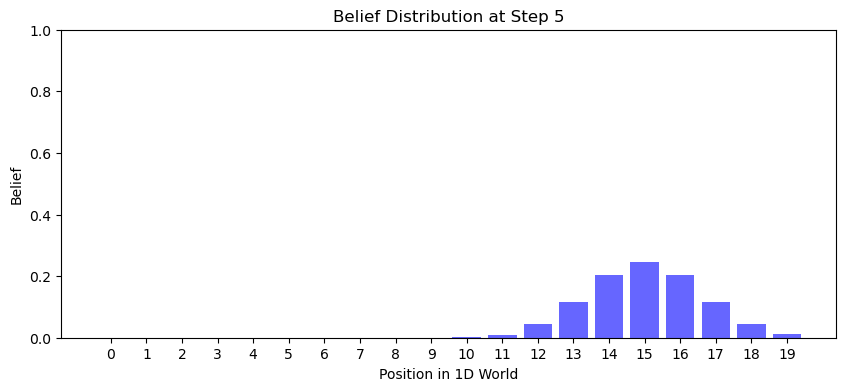

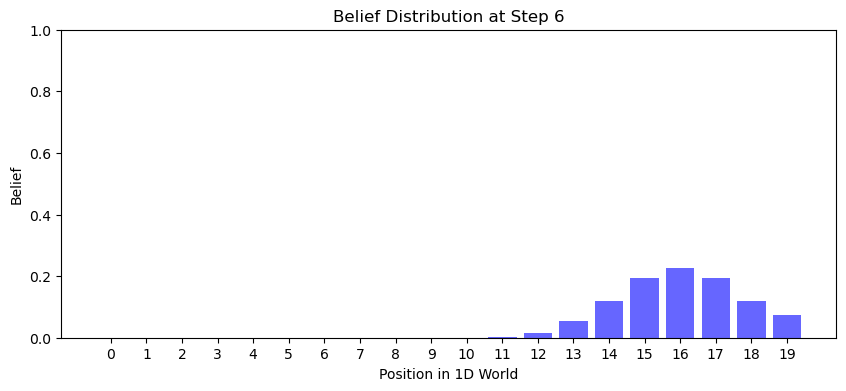

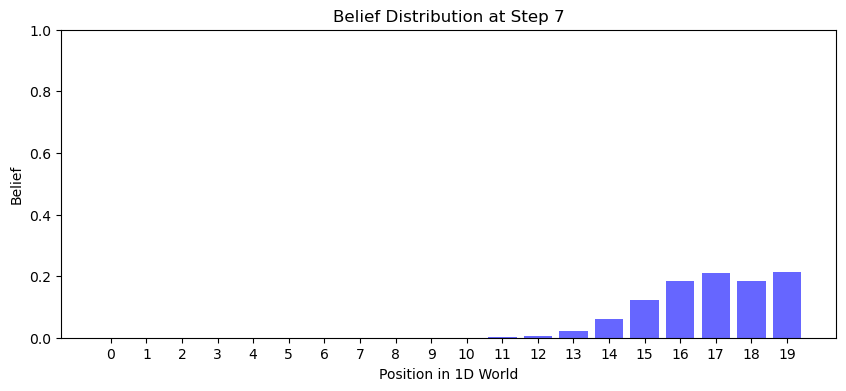

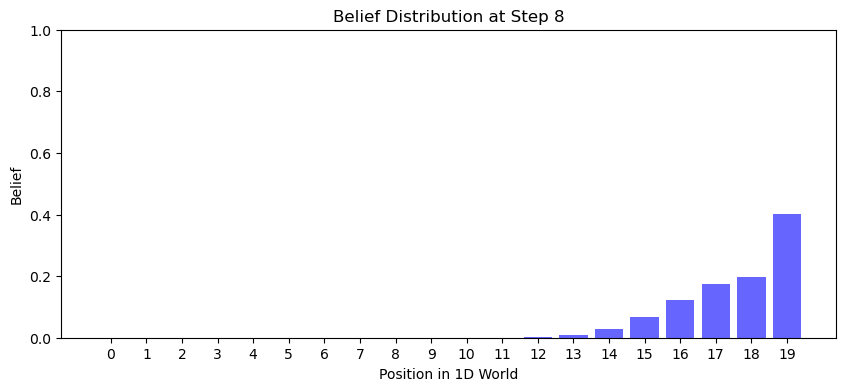

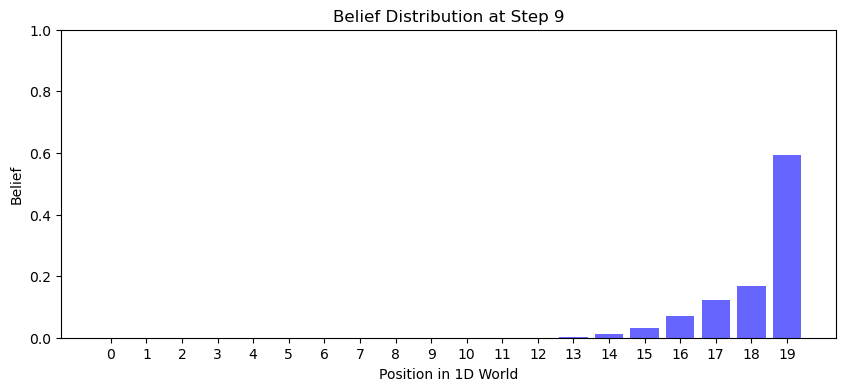

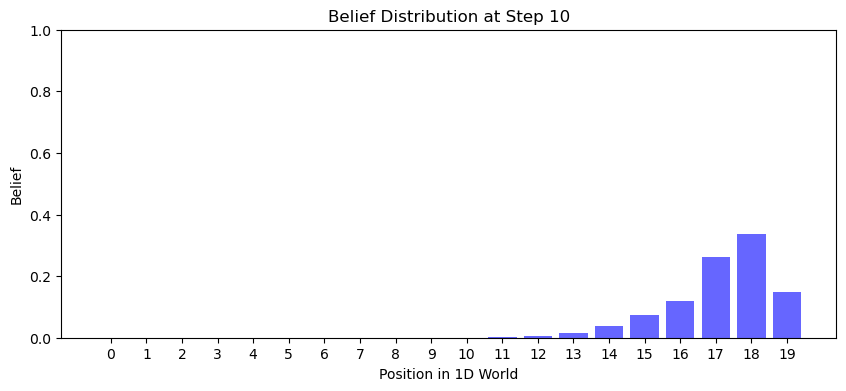

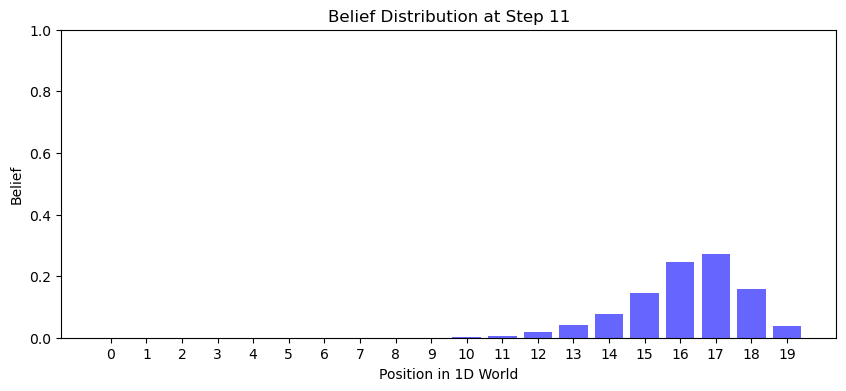

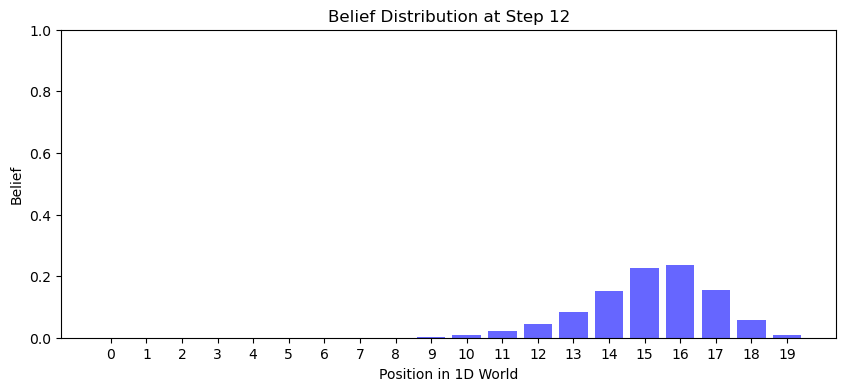

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters for the 1D world
num_cells = 20  # Total number of cells
initial_position = 10  # Starting position of the robot

# Initialize the belief vector, with certainty at the initial position
belief = np.zeros(num_cells)
belief[initial_position] = 1.0  # Robot starts in cell 10 with full certainty

# Define motion model probabilities
stay_prob = 0.25      # Probability of staying in the same cell
move_one_prob = 0.5   # Probability of moving one cell forward/backward
move_two_prob = 0.25  # Probability of moving two cells forward/backward

def move_forward(belief):
    """Updates the belief after a forward move command with imperfect motion."""
    new_belief = np.zeros(num_cells)
    for i in range(num_cells):
        # Probability of staying in the same cell
        new_belief[i] += belief[i] * stay_prob

        # Probability of moving one cell forward
        if i + 1 < num_cells:
            new_belief[i + 1] += belief[i] * move_one_prob
        else:
            new_belief[i] += belief[i] * move_one_prob  # Boundary condition at the last cell

        # Probability of moving two cells forward
        if i + 2 < num_cells:
            new_belief[i + 2] += belief[i] * move_two_prob
        else:
            new_belief[num_cells - 1] += belief[i] * move_two_prob  # Boundary condition at the last cell
    
    return new_belief / new_belief.sum()  # Normalize the belief to sum to 1

def move_backward(belief):
    """Updates the belief after a backward move command with imperfect motion."""
    new_belief = np.zeros(num_cells)
    for i in range(num_cells):
        # Probability of staying in the same cell
        new_belief[i] += belief[i] * stay_prob

        # Probability of moving one cell backward
        if i - 1 >= 0:
            new_belief[i - 1] += belief[i] * move_one_prob
        else:
            new_belief[0] += belief[i] * move_one_prob  # Boundary condition at the first cell

        # Probability of moving two cells backward
        if i - 2 >= 0:
            new_belief[i - 2] += belief[i] * move_two_prob
        else:
            new_belief[0] += belief[i] * move_two_prob  # Boundary condition at the first cell
    
    return new_belief / new_belief.sum()  # Normalize the belief to sum to 1

# Define the sequence of commands
commands = ['forward'] * 9 + ['backward'] * 3

# Track the belief at each step for visualization
belief_history = [belief.copy()]

# Update the belief after each command in the sequence
for command in commands:
    if command == 'forward':
        belief = move_forward(belief)
    elif command == 'backward':
        belief = move_backward(belief)
    belief_history.append(belief.copy())  # Store belief for each step

# Display the final belief distribution and the most likely position
print("Final belief distribution:", belief)
print("Most likely position:", np.argmax(belief))
def plot_belief_bars(belief_history):
    for step, b in enumerate(belief_history):
        plt.figure(figsize=(10, 4))
        plt.bar(range(len(b)), b, alpha=0.6, color='blue')
        plt.xlabel('Position in 1D World')
        plt.ylabel('Belief')
        plt.title(f'Belief Distribution at Step {step}')
        plt.ylim(0, 1)  # Ensure consistent scaling across all plots
        plt.xticks(range(len(b)))
        plt.show()

# Plot the belief distribution for each step as bar graphs
plot_belief_bars(belief_history)

# Discussing the Architecture of Sensor Fusion

Sensor fusion is a technique that combines data from multiple sensors to produce a more accurate and reliable understanding of the environment or system state than any single sensor alone could provide. The architecture of sensor fusion is organized to process and interpret data effectively, dealing with diverse inputs, noise, and different formats.

## Key Components of Sensor Fusion Architecture

1. **Data Acquisition Layer**
   - **Purpose**: Collects raw data from various sensors, which may include cameras, LiDAR, radar, GPS, and inertial measurement units (IMUs).
   - **Challenge**: Different sensors often have unique resolutions, sampling rates, and inherent noise. Synchronizing and managing these differences is critical for accurate fusion.
   - **Example**: In an autonomous vehicle, real-time data is gathered from radar, LiDAR, and cameras, all needing precise alignment in time and space for effective fusion.

2. **Preprocessing Layer**
   - **Purpose**: Cleans and refines raw data to remove noise, apply filters, and correct for sensor biases. This ensures that data from each sensor is as accurate as possible before fusion.
   - **Techniques**: Common techniques include noise reduction filters (e.g., low-pass filters), sensor calibration, and normalization of data to prepare it for fusion.
   - **Example**: An IMU’s accelerometer data may be smoothed to remove high-frequency noise before it is combined with other sensor data.

3. **Data Alignment and Transformation Layer**
   - **Purpose**: Aligns data spatially and temporally so that all sensor data can be integrated into a common coordinate frame and time format.
   - **Techniques**: This layer uses transformations to ensure that GPS, LiDAR, and camera data can be aligned within the same spatial framework. It also synchronizes timestamps to ensure data reflects the same moment in time.
   - **Example**: In robotic systems, GPS data (usually in a global frame) is converted to a local frame to match LiDAR data, enabling accurate mapping.

4. **Fusion Layer**
   - **Purpose**: This is the core of sensor fusion, where data from different sensors is integrated to form a coherent and comprehensive understanding of the environment.
   - **Fusion Levels**:
     - **Low-Level Fusion**: Fuses raw data, providing a highly detailed but computationally intense model.
     - **Mid-Level Fusion**: Combines processed features (e.g., edges from cameras or distances from LiDAR) for a more streamlined approach.
     - **High-Level Fusion**: Integrates final decisions or inferences from each sensor, requiring less data processing.
   - **Example**: In an autonomous vehicle, low-level fusion might create a detailed 3D map from LiDAR and radar, while high-level fusion integrates results from cameras and LiDAR to detect obstacles.

5. **Decision-Making and Control Layer**
   - **Purpose**: Interprets the fused data to produce actionable insights or commands, guiding the system’s response based on the processed information.
   - **Example**: In robotics, this layer could generate navigation commands (e.g., move forward, stop) based on an integrated view of the surroundings created from multi-sensor data.

## Types of Sensor Fusion Architectures

1. **Centralized Architecture**
   - All sensor data is transmitted to a central processor where fusion and analysis occur.
   - **Advantages**: Allows complex fusion algorithms and produces highly integrated data.
   - **Disadvantages**: Demands high computational resources and bandwidth, which may be difficult in real-time applications.
   - **Example**: Centralized fusion is often used in autonomous vehicles where a central processor integrates data from radar, LiDAR, and cameras to build a complete model of the surroundings.

2. **Distributed Architecture**
   - Each sensor performs initial processing of its data, sending only relevant information to the central unit for fusion.
   - **Advantages**: Reduces processing load on the central processor and conserves bandwidth.
   - **Disadvantages**: Limits the detail achievable in data fusion.
   - **Example**: In a multi-robot system, each robot processes its own sensor data and shares essential insights with other robots for collaborative tasks.

## Fusion Algorithms

- **Kalman Filter**: Widely used for real-time applications in linear systems, the Kalman filter estimates a system’s state by minimizing error in the presence of noise.
- **Extended Kalman Filter (EKF)**: An adaptation for non-linear systems, the EKF extends Kalman filter capabilities, commonly used in navigation and tracking applications.
- **Particle Filter**: A probabilistic technique suitable for non-linear, non-Gaussian environments, ideal for applications like robotic localization where uncertainty is high.
- **Deep Learning-Based Fusion**: Neural networks can learn complex relationships between sensor data types, especially useful for camera data fusion with other sensors.

---

This architecture of sensor fusion enables a system to integrate data from multiple sources into a unified representation, enhancing the system’s understanding, accuracy, and ability to make decisions effectively. By combining various components, architectures, and algorithms, sensor fusion systems are tailored to meet the requirements of diverse applications, from autonomous vehicles to intelligent surveillance.